# **Running part**

In [ ]:
import csv
import numpy as np
import math

# Constants ======================================
R = 20.5/1000
L = 26/1000

K_RO = 3
K_ALPHA = 25
K_BETA = -3.5

coefficients = [[R/2, R/2], [R/(2*L), -R/(2*L)]]
# Constants ======================================

# DEFINITIONS =====================================================
def calculate_new_cordinates(x_dot, y_dot, omega, current_x, current_y, current_theta, dt):
    return current_x + x_dot*dt, current_y + y_dot*dt, current_theta + omega*dt

def calculate_I_values(v, omega, theta):
    return v * math.cos(theta), v * math.sin(theta), omega


def calculate_v_omega(ro, alpha, beta):
    return K_RO * ro, K_ALPHA * alpha + K_BETA * beta

def between_pi_and_neg_pi(theta):
    while(theta < -math.pi):
        theta += 2 * math.pi
    while(theta > math.pi):
        theta -= 2 * math.pi
    return theta

def calculate_polar(delta_x, delta_y, theta):
    ro = math.sqrt((delta_x * delta_x) + (delta_y * delta_y))

    alpha = -theta + math.atan2(delta_y, delta_x)
    alpha = between_pi_and_neg_pi(alpha)

    beta = -theta - alpha
    beta = between_pi_and_neg_pi(beta)

    return ro, alpha, beta

def differnce(current_x, current_y ,desiered_x, desiered_y):
  return math.sqrt((desiered_x - current_x) * (desiered_x - current_x) + (desiered_y - current_y) * (desiered_y - current_y))

def calc_deltas(current_x, current_y ,desiered_x, desiered_y):
  return desiered_x - current_x, desiered_y - current_y

def goal_func(x):
  return x * x 

def differential_robot_controller(starting_x, starting_y, desiered_x, desiered_y, initial_theta, dt, threshold = 0.0001):
    Ys = []
    Xs = []
    THETAs = []
    
    theta = initial_theta
    current_x = starting_x
    current_y = starting_y

    while differnce(current_x, current_y ,desiered_x, desiered_y) > threshold:
        del_x, del_y = calc_deltas(current_x, current_y ,desiered_x, desiered_y)

        ro, alpha, beta = calculate_polar(del_x, del_y, theta)

        v, omega = calculate_v_omega(ro, alpha, beta)

        x_dot, y_dot, theta_dot = calculate_I_values(v, omega, theta)

        current_x, current_y, theta = calculate_new_cordinates(x_dot, y_dot, theta_dot, current_x, current_y, theta, dt)

        Ys.append(current_y)
        Xs.append(current_x)
        THETAs.append(theta)

    return Xs, Ys, THETAs
# DEFINITIONS =====================================================

In [ ]:
xxx = []
yyy = []
prev_x = 0
prev_y = 0
for i in range(120):
  des_x = i
  des_y = goal_func(i)
  xx, yy,_ = differential_robot_controller(prev_x, prev_y, des_x, des_y, math.pi/2, 0.01)
  prev_x = des_x
  prev_y = des_y
  xxx.extend(xx)
  yyy.extend(yy)

Text(0, 0.5, 'Y')

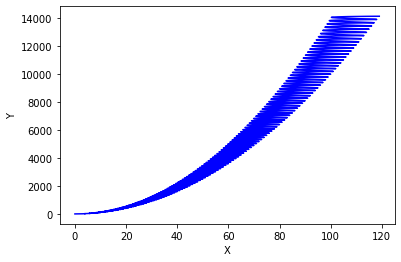

In [ ]:
plt.plot(xxx, yyy, color='blue')
plt.xlabel('X')
plt.ylabel('Y')